In [1]:
import sys
import os
os.chdir(r'/home/root1/sarthak/ThinkStats/ThinkStats2-master/code/')
import nsfg
import numpy as np
df = nsfg.ReadFemPreg()

In [2]:
df['birthwgt_lb'].values

array([ 8.,  7.,  9., ..., nan,  7.,  7.])

### Plotting Histograms in Matplotlib

In [3]:
from matplotlib import pyplot as plt

([<matplotlib.axis.XTick at 0x7f0de83c7f28>,
 <a list of 14 Text xticklabel objects>)

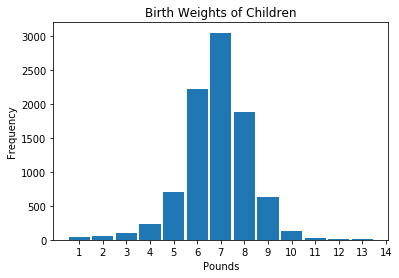

In [4]:
live = df[df.outcome == 1]
plt.hist(live['birthwgt_lb'].values, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14],align = 'left', rwidth=0.9)
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.title('Birth Weights of Children')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

###  Mode = 7
Normal distribution, but not true normal distribution since the tail extends farther to the left than the right and hence is not symmetric. 

([<matplotlib.axis.XTick at 0x7ff15cdbcf98>,
 <a list of 15 Text xticklabel objects>)

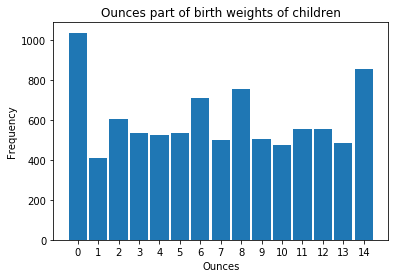

In [53]:

plt.hist(live['birthwgt_oz'].values, align = 'left', rwidth=0.9, bins = 15)
plt.xlabel('Ounces')
plt.ylabel('Frequency')
plt.title('Ounces part of birth weights of children')
plt.xticks([i for i in range(0,15)])

In theory we expect this distribution to be uniform; that is, all
values should have the same frequency. In fact, 0 is more common than the
other values, and 1 and 15 are less common, probably because respondents
round o birth weights that are close to an integer value.

Text(0.5, 1.0, "Mother's Age at the end of pregnancy")

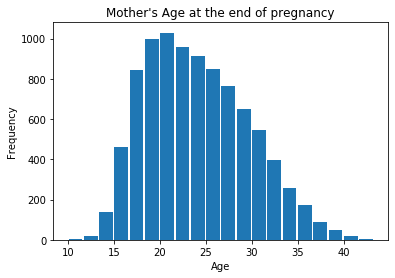

In [57]:

plt.hist(live['agepreg'].values, align = 'left', rwidth=0.9, bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Mother's Age at the end of pregnancy")
# plt.xticks([i for i in range(0,50)])

The mode is 21 years. The distribution is very roughly bell-
shaped, but in this case the tail extends farther to the right than left; most
mothers are in their 20s, fewer in their 30s.

Text(0.5, 1.0, 'Histogram of pregnancy length in weeks.')

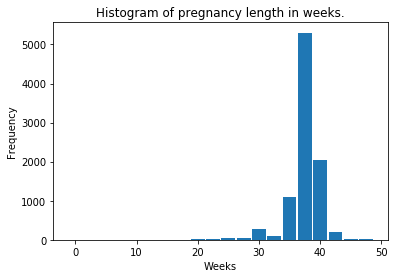

In [61]:
plt.hist(live['prglngth'].values, align = 'left', rwidth=0.9, bins = 20)
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.title("Histogram of pregnancy length in weeks.")
# plt.xticks([i for i in range(0,50)])

By far the most common value is 39 weeks. The left tail is longer
than the right; early babies are common, but pregnancies seldom go past 43
weeks, and doctors often intervene if they do.

In [80]:
from collections import Counter
sorted(Counter(live['prglngth']).items() , reverse=True, key=lambda x: x[0])

[(50, 2),
 (48, 7),
 (47, 1),
 (46, 1),
 (45, 10),
 (44, 46),
 (43, 148),
 (42, 328),
 (41, 587),
 (40, 1116),
 (39, 4693),
 (38, 607),
 (37, 455),
 (36, 321),
 (35, 311),
 (34, 60),
 (33, 49),
 (32, 115),
 (31, 27),
 (30, 138),
 (29, 21),
 (28, 32),
 (27, 3),
 (26, 35),
 (25, 3),
 (24, 13),
 (23, 1),
 (22, 7),
 (21, 2),
 (20, 1),
 (19, 1),
 (18, 1),
 (17, 2),
 (13, 1),
 (9, 1),
 (4, 1),
 (0, 1)]

##  First Babies v/s Others

In [82]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [91]:
firsts_l = firsts.prglngth.values
others_l = others.prglngth.values

In [92]:
len(firsts_l),len(others_l)

(4413, 4735)

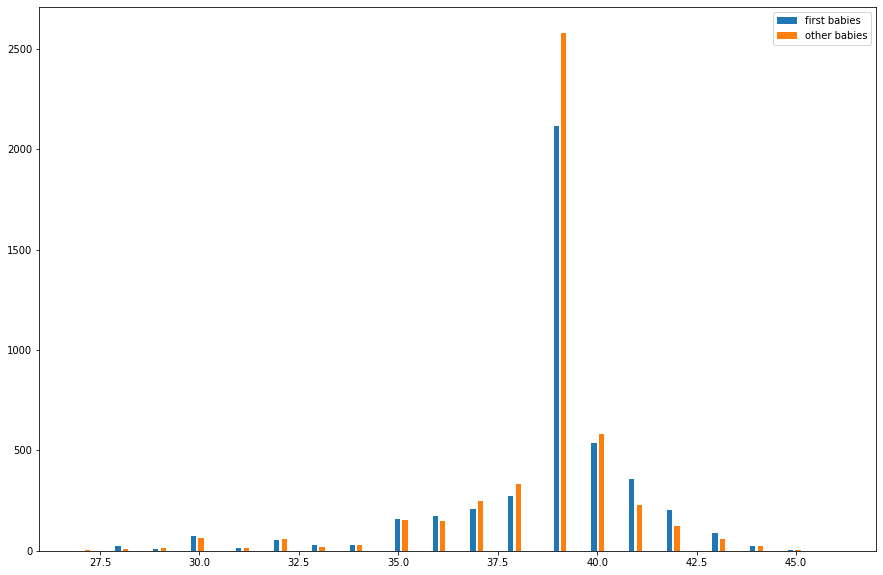

In [108]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.hist(firsts_l, rwidth=0.7,bins = 100,label = 'first babies',align='left', range = (27,46))
plt.hist(others_l, rwidth=0.7,bins = 100,label = 'other babies',align='right',range = (27,46))
pyplot.legend(loc='upper right')

In [112]:
# Calculating summary statistics using Pandas
mean = live.prglngth.mean()
variance = live.prglngth.var()
std = live.prglngth.std()
mean,variance,std

(38.56055968517709, 7.302662067826817, 2.702343810070587)

## Measuring Effect Size

In [113]:
# By difference in mean

In [115]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [117]:
av_pg_l = live.prglngth.mean()
av_pg_l

38.56055968517709

In [120]:
(firsts.prglngth.mean() - others.prglngth.mean())/av_pg_l*100

0.20237586646738304

0.2% difference as compared to a typical prg length

### Effect Size using Cohen's d

In [123]:
import math
def cohen_d(array1, array2):
    mean_difference = array1.mean() - array2.mean()
    var1, var2 = array1.var(), array2.var()
    n1 = len(array1)
    n2 = len(array2)
    pooled_variation = (n1*var1 + n2*var2)/(n1+n2)
    d = mean_difference/(math.sqrt(pooled_variation))
    return d

In [124]:
cohen_d(firsts.prglngth, others.prglngth)

0.028879044654449834

####  0.028 std deviations is a very small effect size